<a href="https://colab.research.google.com/github/Tixi3/Emotion-recognition-from-speech-based-on-ML-algorithms-applied-on-two-Serbian-datasets/blob/main/D211122021.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import cv2
from google.colab.patches import cv2_imshow
print(cv2.__version__)

# povezivanje sa Google drive-om
from google.colab import drive
drive.mount('//content//gdrive')

# učitavanje dodatnih biblioteka potrebnih za vjezbu
import numpy as np
from skimage.segmentation import slic
from skimage.segmentation import mark_boundaries
from skimage.util import img_as_float
from skimage import io
import matplotlib.pyplot as plt
import pandas as pd

4.1.2
Mounted at //content//gdrive


In [ ]:
#Ucitavanje videa
cap = cv2.VideoCapture('/content/gdrive/MyDrive/master/Komp_vizija/Vežbe/xo1c.avi')
if cap.isOpened():
    width  = cap.get(cv2.CAP_PROP_FRAME_WIDTH)   # float `width`
    height = cap.get(cv2.CAP_PROP_FRAME_HEIGHT)  # float `height`
    fps = cap.get(cv2.CAP_PROP_FPS) # float `fps`
    total_frames = cap.get(cv2.CAP_PROP_FRAME_COUNT) # float `total_frame_in_the_video` (should not be applicable for camera)

    print(width)
    print(height)

640.0
512.0


In [ ]:
from collections import defaultdict
def segment_by_angle_kmeans(lines, k=2, **kwargs):
    """Groups lines based on angle with k-means.

    Uses k-means on the coordinates of the angle on the unit circle
    to segment `k` angles inside `lines`.
    """

    # Define criteria = (type, max_iter, epsilon)
    default_criteria_type = cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER
    criteria = kwargs.get('criteria', (default_criteria_type, 10, 1.0))
    flags = kwargs.get('flags', cv2.KMEANS_RANDOM_CENTERS)
    attempts = kwargs.get('attempts', 10)

    # returns angles in [0, pi] in radians
    angles = np.array([line[0][1] for line in lines])
    # multiply the angles by two and find coordinates of that angle
    pts = np.array([[np.cos(2*angle), np.sin(2*angle)]
                    for angle in angles], dtype=np.float32)

    # run kmeans on the coords
    labels, centers = cv2.kmeans(pts, k, None, criteria, attempts, flags)[1:]
    labels = labels.reshape(-1)  # transpose to row vec

    # segment lines based on their kmeans label
    segmented = defaultdict(list)
    for i, line in enumerate(lines):
        segmented[labels[i]].append(line)
    segmented = list(segmented.values())
    return segmented

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Presek Hafovih linija
def intersection(line1, line2):
    """Finds the intersection of two lines given in Hesse normal form.

    Returns closest integer pixel locations.
    See https://stackoverflow.com/a/383527/5087436
    """
    rho1, theta1 = line1[0]
    rho2, theta2 = line2[0]
    A = np.array([
        [np.cos(theta1), np.sin(theta1)],
        [np.cos(theta2), np.sin(theta2)]
    ])
    b = np.array([[rho1], [rho2]])
    x0, y0 = np.linalg.solve(A, b)
    x0, y0 = int(np.round(x0)), int(np.round(y0))
    return [[x0, y0]]


def segmented_intersections(lines):
    """Finds the intersections between groups of lines."""

    intersections = []
    for i, group in enumerate(lines[:-1]):
        for next_group in lines[i+1:]:
            for line1 in group:
                for line2 in next_group:
                    intersections.append(intersection(line1, line2))
    return intersections

In [ ]:
def minmax(lista):
        x_vred = []
        y_vred = []
        for i in range(0,4):
          x = lista[i][0][0]
          x_vred.append(x)
          y = lista[i][0][1]
          y_vred.append(y)

        min_vr_x = np.min(x_vred)
        max_vr_x = np.max(x_vred)
        min_vr_y = np.min(y_vred)
        max_vr_y = np.max(y_vred)
        # print('Min x= ', min_vr_x)
        # print('Min y= ', min_vr_y)
        # print('Max x= ', max_vr_x)
        # print('Max y= ', max_vr_y)

        return min_vr_x, max_vr_x, min_vr_y, max_vr_y

In [ ]:
#Podela polja
def podela_polja(lista,frame):
        x_vred = []
        y_vred = []
        for i in range(0,4):
          x = lista[i][0][0]
          x_vred.append(x)
          y = lista[i][0][1]
          y_vred.append(y)

        min_vr_x = np.min(x_vred)
        max_vr_x = np.max(x_vred)
        min_vr_y = np.min(y_vred)
        max_vr_y = np.max(y_vred)
        # print('Min x= ', min_vr_x)
        # print('Min y= ', min_vr_y)
        # print('Max x= ', max_vr_x)
        # print('Max y= ', max_vr_y)

        polje1 = frame[0:min_vr_x-10,0:min_vr_y-10]
        #gray1 = cv2.cvtColor(polje1,cv2.COLOR_BGR2GRAY)
        edges1 = cv2.Canny(polje1, 100, 150, apertureSize=3)
        polje2 = frame[min_vr_x+10:max_vr_x-10, 0:min_vr_y-10]
        #gray2 = cv2.cvtColor(polje2,cv2.COLOR_BGR2GRAY)
        edges2 = cv2.Canny(polje2, 100, 150, apertureSize=3)
        polje3 = frame[max_vr_x+10:-1, 0:min_vr_y-10]
        #gray3 = cv2.cvtColor(polje3,cv2.COLOR_BGR2GRAY)
        edges3 = cv2.Canny(polje3, 100, 150, apertureSize=3)
        polje4 = frame[0:min_vr_x-10, min_vr_y+10:max_vr_y-10]
        #gray4 = cv2.cvtColor(polje4,cv2.COLOR_BGR2GRAY)
        edges4 = cv2.Canny(polje4, 100, 150, apertureSize=3)
        polje5 = frame[min_vr_x+10:max_vr_x-10, min_vr_y+10:max_vr_y-10]
        #gray5 = cv2.cvtColor(polje5,cv2.COLOR_BGR2GRAY)
        edges5 = cv2.Canny(polje5, 100, 150, apertureSize=3)
        polje6 = frame[max_vr_x+10:-1, min_vr_y+10:max_vr_y-10]
        #gray6 = cv2.cvtColor(polje6,cv2.COLOR_BGR2GRAY)
        edges6 = cv2.Canny(polje6, 100, 150, apertureSize=3)
        polje7 = frame[0:min_vr_x-10, max_vr_y+10:-1]
        #gray7 = cv2.cvtColor(polje7,cv2.COLOR_BGR2GRAY)
        edges7 = cv2.Canny(polje7, 100, 150, apertureSize=3)
        polje8 = frame[min_vr_x+10:max_vr_x-10, max_vr_y+10:-1]
        #gray8 = cv2.cvtColor(polje8,cv2.COLOR_BGR2GRAY)
        edges8 = cv2.Canny(polje8, 100, 150, apertureSize=3)
        polje9 = frame[max_vr_x:-1, max_vr_y:-1]
        #gray9 = cv2.cvtColor(polje9,cv2.COLOR_BGR2GRAY)
        edges9 = cv2.Canny(polje9, 100, 150, apertureSize=3)

        return edges1, edges2, edges3, edges4, edges5, edges6, edges7, edges8, edges9

In [ ]:
def polja_rgb(lista,frame):
        x_vred = []
        y_vred = []
        for i in range(0,4):
          x = lista[i][0][0]
          x_vred.append(x)
          y = lista[i][0][1]
          y_vred.append(y)

        min_vr_x = np.min(x_vred)
        max_vr_x = np.max(x_vred)
        min_vr_y = np.min(y_vred)
        max_vr_y = np.max(y_vred)
        # print('Min x= ', min_vr_x)
        # print('Min y= ', min_vr_y)
        # print('Max x= ', max_vr_x)
        # print('Max y= ', max_vr_y)

        polje1 = frame[0:min_vr_x-10,0:min_vr_y-10]

        polje2 = frame[min_vr_x+10:max_vr_x-10, 0:min_vr_y-10]

        polje3 = frame[max_vr_x+10:-1, 0:min_vr_y-10]

        polje4 = frame[0:min_vr_x-10, min_vr_y+10:max_vr_y-10]

        polje5 = frame[min_vr_x+10:max_vr_x-10, min_vr_y+10:max_vr_y-10]

        polje6 = frame[max_vr_x+10:-1, min_vr_y+10:max_vr_y-10]

        polje7 = frame[0:min_vr_x-10, max_vr_y+10:-1]

        polje8 = frame[min_vr_x+10:max_vr_x-10, max_vr_y+10:-1]

        polje9 = frame[max_vr_x:-1, max_vr_y:-1]

        return polje1, polje2, polje3, polje4, polje5, polje6, polje7, polje8, polje9

In [ ]:
def konture(intersections, frame):
        edges1, edges2, edges3, edges4, edges5, edges6, edges7, edges8, edges9 = podela_polja(intersections, frame)
        lista_edges= [edges1, edges2, edges3, edges4, edges5, edges6, edges7, edges8, edges9]
        konture1_9 = []
        sve_konture = []
        for i in lista_edges:
          contours, hierarchy= cv2.findContours(i.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
          number_of_objects_in_image= len(contours)
        konture1_9.append(number_of_objects_in_image)

        return konture1_9, contours

In [ ]:
def detectShape( img ):
    shape = "NA"
    #ulazni parametar je gray slika                                                                         # initialize the shape as NA - not available
    cX_lista = []
    cY_lista = []
    shapes = []
    #cv.imshow('Orig', img)                                                                  # show original frame
    # convert image to grayscale and add slight blur:
    gray_img2 = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    #konverzija u 8bitnu sliku
    gray_img= cv2.convertScaleAbs(gray_img2)
    blurred_img = cv2.GaussianBlur(gray_img, (3, 3), 0)

    # threshold image to create a binary image
    thresh_img = cv2.threshold(blurred_img, 20, 255, cv2.THRESH_BINARY_INV)[1]
    #cv2_imshow('Thresholded video', thresh_img)

    contour_list, hier = cv2.findContours(thresh_img, cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)   # find contours of thresholded image
    #contour_list = imutils.grab_contours(contour_list)                                      # <- store contours in list/sequence
    #print(len(contour_list))
    #print(hier)
    for c in range(len(contour_list)):
        perimiter = cv2.arcLength(contour_list[c], True)                     # calculate te perimiter of the detected object/shape
        approx = cv2.approxPolyDP(contour_list[c], 0.04 * perimiter, True)   # built-in function for approximating the detected contour ->


        M = cv2.moments(contour_list[c])                     # find countour centres using geometric moments
        try:
            cX = int(M["m10"] / M["m00"])
            cY = int(M["m01"] / M["m00"])
        except:
            continue

        # print('dfqegq')
        # print('Value of approx is: ', len(approx))    # this line is used for testing
        # print(len(approx))

        if ((len(approx) <= 4) or (len(approx) > 12)):      # rectangle or border detected -> skip
            continue
        elif ((len(approx) <= 7) and (len(approx) >=5)):   # circle detected
            shape = "O"
            # M = cv2.moments(contour_list[c])                     # find countour centres using geometric moments
            # try:
            #     cX = int(M["m10"] / M["m00"])
            #     cY = int(M["m01"] / M["m00"])
            # except:
            #     continue
            cX_lista.append(cX)
            cY_lista.append(cY)
            shapes.append(shape)
        elif ((len(approx) <= 12) or (len(approx) > 7)):                                               # anything else is X -> assuming players are only allowed to put 'X' or 'O'
            shape = "X"
            cX_lista.append(cX)
            cY_lista.append(cY)
            shapes.append(shape)

        # cv2.drawContours(img, contour_list[c], -1, (0, 255, 0), 2)                                   # draw contours
        # cv2.putText(img, shape, (cX, cY), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 2)

    return cX_lista, cY_lista, shapes








In [ ]:
def cut_roi(edges,image):
  #prolazi se kroz masku (izdvojene ivice) sa leve strane da se pronadje prvi beli piksel
  c=0
  i1=0
  while c==0:
    if sum(edges[i1,:])==0:
      i1+=1
    else:
      c=1
  # prolazi se kroz masku (izdvojene ivice) sa desne strane da se pronadje prvi beli piksel
  c = 0
  i2= edges.shape[0]-1
  while c == 0:
    if sum(edges[i2, :]) == 0:
      i2 -= 1
    else:
      c = 1
  # prolazi se kroz masku (izdvojene ivice) od gore da se pronadje prvi beli piksel
  c = 0
  j1 = 0
  while c == 0:
    if sum(edges[:, j1]) == 0:
      j1 += 1
    else:
      c = 1
  # prolazi se kroz masku (izdvojene ivice) od dole da se pronadje prvi beli piksel
  c = 0
  j2 = edges.shape[1]-1
  while c == 0:
    if sum(edges[:, j2]) == 0:
      j2 -= 1
    else:
      c = 1
  #isecanje
  roi_mask=edges[i1:i2,j1:j2]
  image_roi=image[i1:i2,j1:j2]

  return roi_mask,image_roi

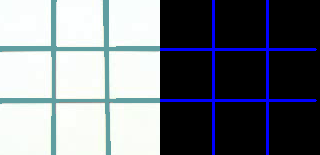

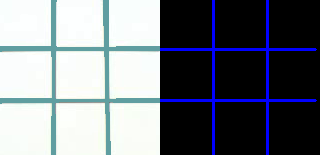

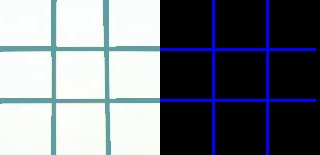

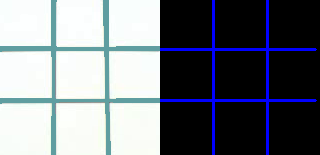

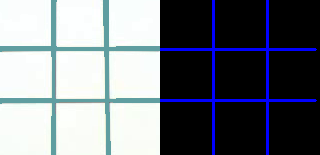

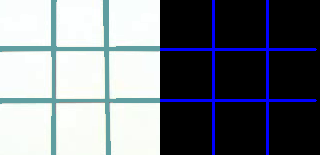

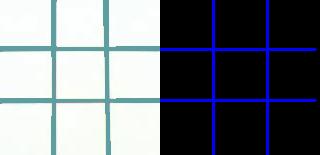

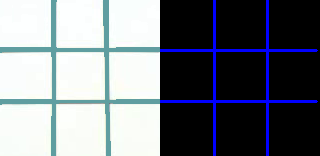

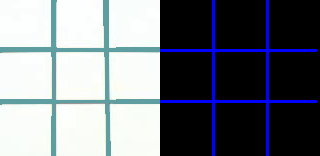

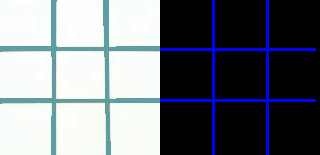

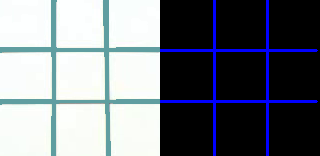

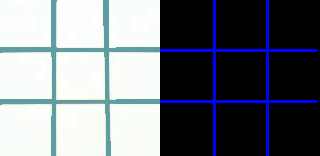

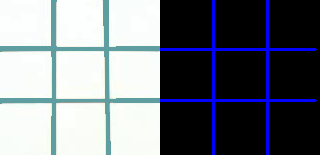

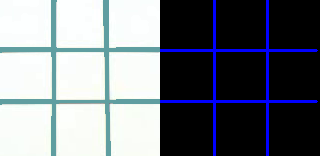

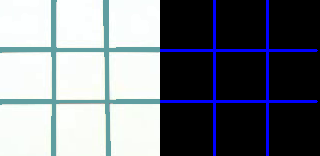

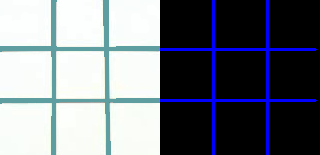

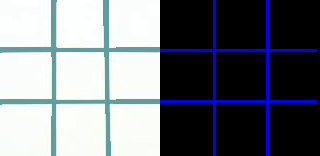

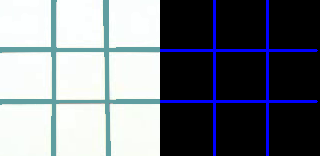

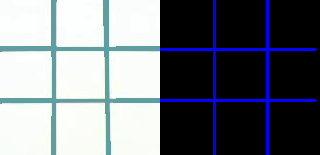

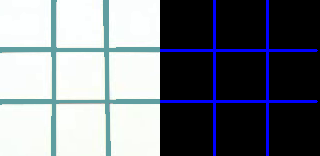

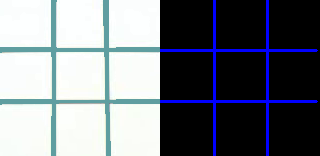

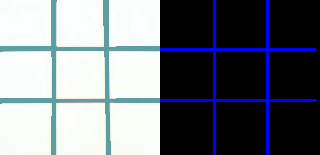

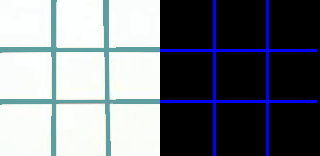

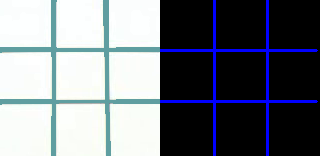

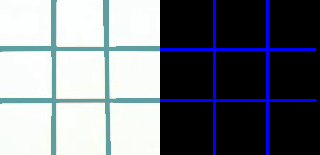

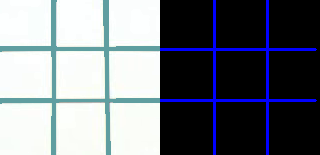

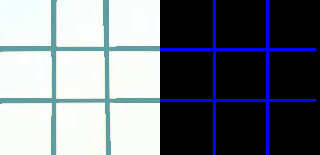

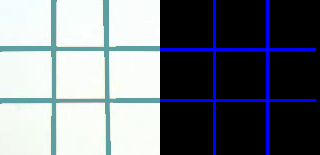

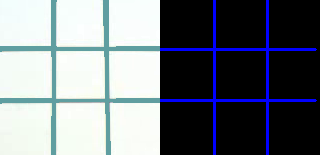

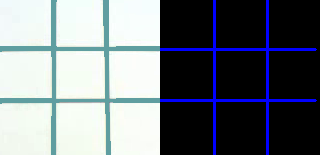

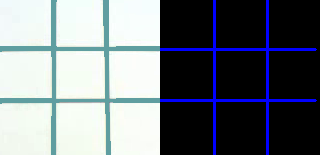

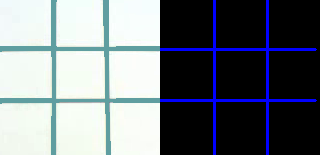

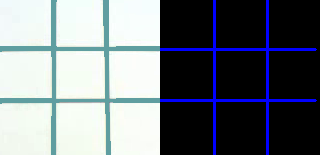

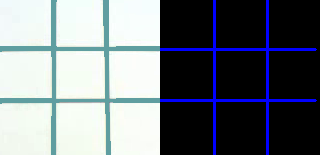

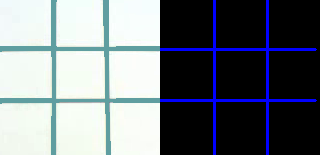

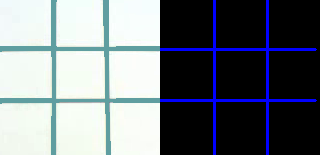

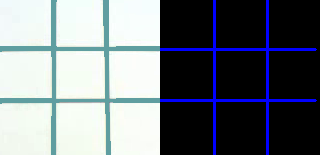

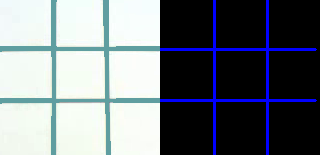

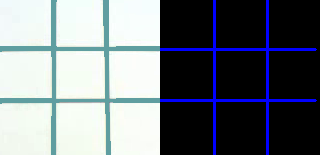

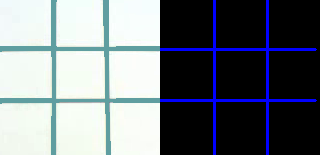

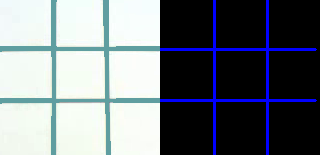

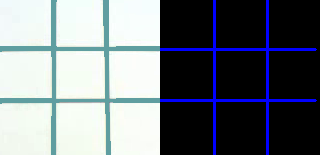

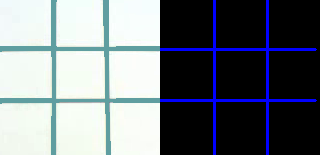

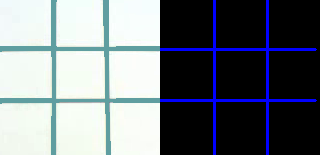

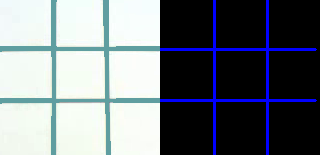

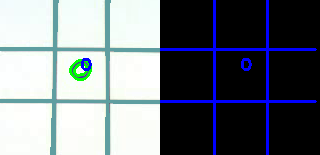

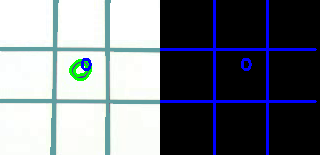

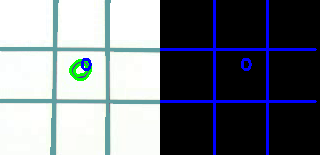

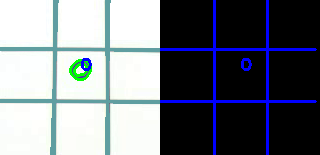

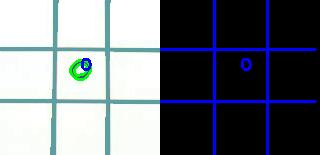

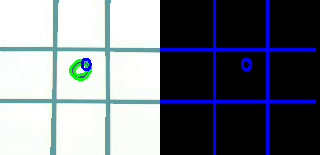

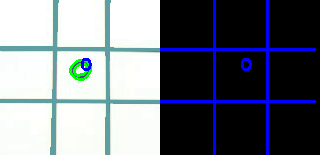

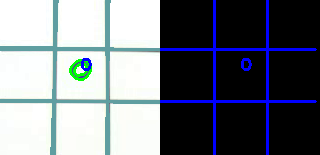

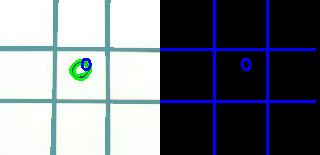

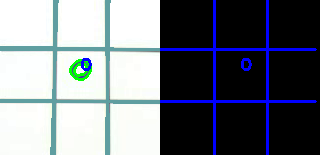

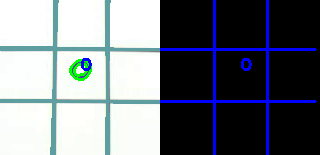

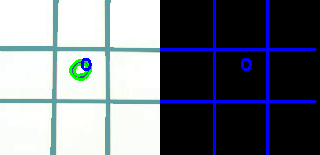

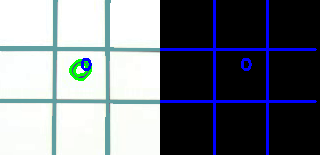

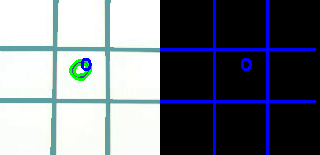

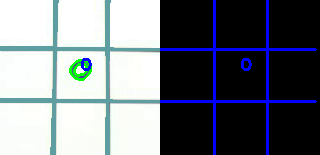

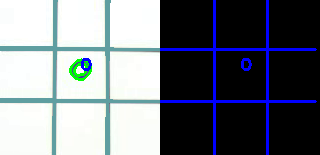

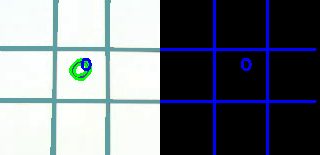

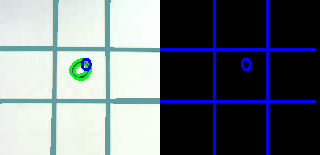

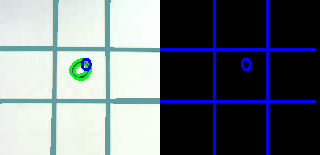

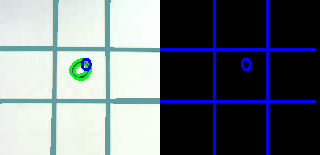

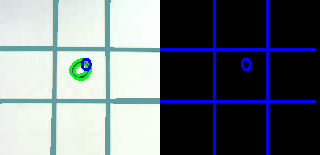

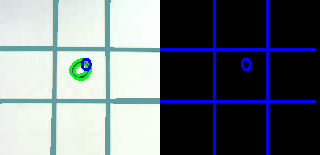

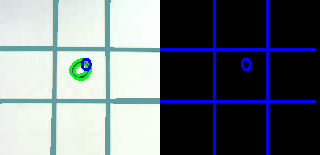

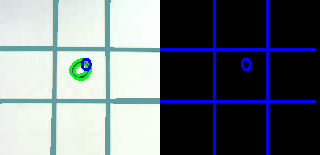

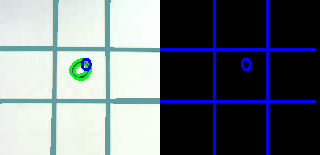

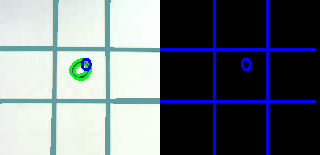

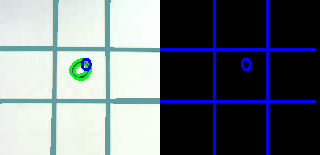

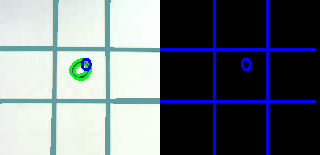

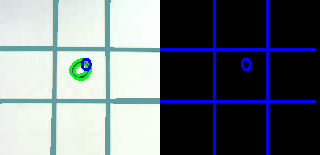

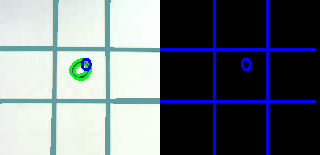

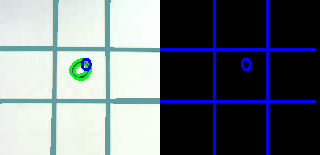

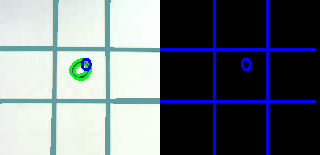

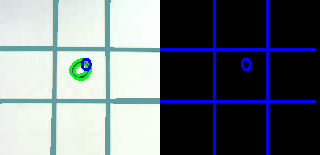

In [ ]:
import numpy as np
import cv2
from google.colab.patches import cv2_imshow
from statistics import stdev
ruka = []
strong_lines = np.zeros([4,1,2])
while True:
    ret, frame1 = cap.read()

    if ret == True:
      frame = frame1[0:360, 130:600]

      #print(cap.get(cv2.CAP_PROP_POS_FRAMES))
      gray = cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)
      #print(gray.shape)
      st = gray.std()
      if st <35:

        edges_1 = cv2.Canny(gray, 100, 150, apertureSize=3)
        rect = cv2.getStructuringElement(cv2.MORPH_RECT, (3,3))
        dilation = cv2.dilate(edges_1, rect, iterations=2)
        erosion = cv2.erode(dilation, rect, iterations=3)
        edges_2=erosion
        # za prikaz mreze - prikaz u boji
        edges,frame2=cut_roi(edges_2,frame)
        # za dalji rad sa konturama-siva slika
        edges_gray,frame2_gray=cut_roi(edges_2,gray)
        #cv2_imshow(edges)
        print('')
        #print(frame2.shape)

        # Hafova transformacija
        lines = cv2.HoughLines(edges,1,np.pi/180,100)
        for line in lines:
          rho,theta = line[0]
          a = np.cos(theta)
          b = np.sin(theta)
          x0 = a*rho
          y0 = b*rho
          x1 = int(x0 + 1000*(-b))
          y1 = int(y0 + 1000*(a))
          x2 = int(x0 - 1000*(-b))
          y2 = int(y0 - 1000*(a))

          cv2.line(frame2,(x1,y1),(x2,y2),(160,158,95),2)


        n2 = 0
        for n1 in range(0,len(lines)):
            for rho,theta in lines[n1]:
                if n1 == 0:
                    strong_lines[n2] = lines[n1]
                    n2 = n2 + 1
                else:
                    if rho < 0:
                      rho*=-1
                      theta-=np.pi
                    closeness_rho = np.isclose(rho,strong_lines[0:n2,0,0],atol = 10)
                    closeness_theta = np.isclose(theta,strong_lines[0:n2,0,1],atol = np.pi/36)
                    closeness = np.all([closeness_rho,closeness_theta],axis=0)
                    if not any(closeness) and n2 < 4:
                        strong_lines[n2] = lines[n1]
                        n2 = n2 + 1
        segmented = segment_by_angle_kmeans(strong_lines)
        intersections = segmented_intersections(segmented)
        minx, maxx, miny, maxy = minmax(intersections)
        [xkraj,ykraj,zvrednost]=frame2.shape
        papir=np.zeros((xkraj,ykraj,3), np.uint8)
        cv2.line(papir,(0,miny),(xkraj,miny),(255,0,0),2)
        cv2.line(papir,(0,maxy),(xkraj,maxy),(255,0,0),2)
        cv2.line(papir,(minx,0),(minx,ykraj),(255,0,0),2)
        cv2.line(papir,(maxx,0),(maxx,ykraj),(255,0,0),2)
        #cv2_imshow(papir)

        # br_kont, konture_9 = konture(intersections,frame2)
        # print(br_kont)

        edges1, edges2, edges3, edges4, edges5, edges6, edges7, edges8, edges9 = podela_polja(intersections, frame2_gray)
        polje1, polje2, polje3, polje4, polje5, polje6, polje7, polje8, polje9 = polja_rgb(intersections, frame2)
        lista_gray = [edges1, edges2, edges3, edges4, edges5, edges6, edges7, edges8, edges9 ]
        lista_rgb = [polje1, polje2, polje3, polje4, polje5, polje6, polje7, polje8, polje9]
        ################################
        #detekcija kontura i odredjivanje objekata
        shape = "NA"
        #ulazni parametar je gray slika                                                                         # initialize the shape as NA - not available

        #cv.imshow('Orig', img)                                                                  # show original frame
        # convert image to grayscale and add slight blur:
        gray_img2 = cv2.cvtColor(frame2, cv2.COLOR_BGR2GRAY)
        #konverzija u 8bitnu sliku
        gray_img= cv2.convertScaleAbs(gray_img2)
        blurred_img = cv2.GaussianBlur(gray_img, (3, 3), 0)

        # threshold image to create a binary image
        thresh_img = cv2.threshold(blurred_img, 170, 255, cv2.THRESH_BINARY)[1]
        #cv2_imshow('Thresholded video', thresh_img)

        contour_list, hier = cv2.findContours(thresh_img, cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)   # find contours of thresholded image
        #contour_list = imutils.grab_contours(contour_list)                                      # <- store contours in list/sequence
        #print(len(contour_list))
        #print(hier)

        for c in range(len(contour_list)):
            perimiter = cv2.arcLength(contour_list[c], True)                     # calculate te perimiter of the detected object/shape
            approx = cv2.approxPolyDP(contour_list[c], 0.04 * perimiter, True)   # built-in function for approximating the detected contour ->


            M = cv2.moments(contour_list[c])                     # find countour centres using geometric moments
            try:
                cX = int(M["m10"] / M["m00"])
                cY = int(M["m01"] / M["m00"])
            except:
                continue


            # print('dfqegq')
            # print('Value of approx is: ', len(approx))    # this line is used for testing
            # print(len(approx))

            if ((len(approx) <= 4) or (len(approx) > 9)):      # rectangle or border detected -> skip
                continue
            elif ((len(approx) <= 7) and (len(approx) >=5)):   # circle detected
                shape = "O"

            else:                                               # anything else is X -> assuming players are only allowed to put 'X' or 'O'
                shape = "X"


            cv2.drawContours(frame2, contour_list[c], -1, (0, 255, 0), 2)
            cv2.putText(frame2, shape, (cX, cY), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 2)                                 # draw contours
            cv2.putText(papir, shape, (cX, cY), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 2)
        #cv2_imshow(frame2)
        # im_h = cv2.hconcat([frame2, papir])
        # cv2_imshow(im_h)




        # print('1')
        # cv2_imshow(edges1)
        # print('2')
        # cv2_imshow(edges2)
        #print('3')
        #cv2_imshow(edges3)
        #print('4')
        #cv2_imshow(edges4)
        # print('Peto polje')
        # cv2_imshow(edges5)
        # print('6')
        # cv2_imshow(edges6)
        #print('7')
        #cv2_imshow(edges7)
        #print('8')
        #cv2_imshow(edges8)
        #print('9')
        #cv2_imshow(edges9)


        # ret, kont = iscrtavanje_kont(edges5)
        # print('podudaranje', ret)
        # cv2.drawContours(edges5, [kont], 0 , color=(0,0,0), thickness=3)
        # cv2_imshow(edges5)

      else:
        ruka.append(frame2)

    else:
      break


    # Prikaz rezultata
    print('')
    print('')
    im_h = cv2.hconcat([frame2, papir])
    cv2_imshow(im_h)

# cv2.imwrite('/content/gdrive/MyDrive/master/Komp_vizija/Vežbe/papir.jpg', papir)
# poslednji_frame = cv2.imread('/content/gdrive/MyDrive/master/Komp_vizija/Vežbe/papir.jpg')
# cv2.line(poslednji_frame,(0,miny),(xkraj,miny),(0,0,0),3)
# cv2.line(poslednji_frame,(0,maxy),(xkraj,maxy),(0,0,0),3)
# cv2.line(poslednji_frame,(minx,0),(minx,ykraj),(0,0,0),3)
# cv2.line(poslednji_frame,(maxx,0),(maxx,ykraj),(0,0,0),3)
# cX_lista, cY_lista, shapes = detectShape(poslednji_frame)

# print('cX', cX_lista)
# print('')
# print('cY', cY_lista)
# print('')
# print('oblici', shapes)




In [ ]:
# cv2.line(poslednji_frame,(0,miny),(xkraj,miny),(0,0,0),3)
# cv2.line(poslednji_frame,(0,maxy),(xkraj,maxy),(0,0,0),3)
# cv2.line(poslednji_frame,(minx,0),(minx,ykraj),(0,0,0),3)
# cv2.line(poslednji_frame,(maxx,0),(maxx,ykraj),(0,0,0),3)
# cv2_imshow(poslednji_frame)

NameError: ignored

In [ ]:
# cv2.line(poslednji_frame,(0,miny),(xkraj,miny),(0,0,0),4)
# cv2.line(poslednji_frame,(0,maxy),(xkraj,maxy),(0,0,0),4)
# cv2.line(poslednji_frame,(minx,0),(minx,ykraj),(0,0,0),4)
# cv2.line(poslednji_frame,(maxx,0),(maxx,ykraj),(0,0,0),4)
# cv2_imshow(poslednji_frame)

In [ ]:
# cX_lista, cY_lista, shapes = detectShape(poslednji_frame)

# print('cX', cX_lista)
# print('')
# print('cY', cY_lista)
# print('')
# print('oblici', shapes)

In [ ]:
# cv2_imshow(thresh_img)

In [ ]:
# gray_img2 = cv2.cvtColor(poslednji_frame, cv2.COLOR_BGR2GRAY)
# cv2_imshow(gray_img2)
# # gray_img= cv2.convertScaleAbs(gray_img2)
# # cv2_imshow(gray_img)
# blurred_img = cv2.GaussianBlur(gray_img2, (3, 3), 0)
# cv2_imshow(blurred_img)
# # threshold image to create a binary image
# thresh_img = cv2.threshold(blurred_img, 20, 255, cv2.THRESH_BINARY_INV)[1]
# cv2_imshow(thresh_img)

In [ ]:
#contour_list, hier = cv2.findContours(poslednji_frame, cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)

In [ ]:
# thresh_img = cv2.threshold(poslednji_frame, 170, 255, cv2.THRESH_BINARY)[1]
# cv2_imshow(thresh_img)

In [ ]:
#print(frame2.shape)